<a href="https://colab.research.google.com/github/ekoly/bert-tests/blob/master/Unit_4_Sprint_1_Natural_Language_Processing_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/cannabis.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (2351, 6) 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: `Your Answer Here`

**Token**: `Your Answer Here`

**Corpus**: `Your Answer Here`

**Stopwords**: `Your Answer Here`

**Statistical Trimming**: `Your Answer Here`

**Stemming**: `Your Answer Here`

**Lemmatization**: `Your Answer Here`

**Vectorization**: `Your Answer Here`

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
 1. `Your Answer Here`
 2. `Your Answer Here`
 3. `Your Answer Here`
 4. `Your Answer Here`

2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?
```
Your Answer Here
```

3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.
```
Your Answer Here
```

4. Why do we need to vectorize our documents?
```
Your Answer Here
```

## Practice Problems

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [4]:
!python3 -m spacy download en_core_web_lg

import spacy

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=eefff15fdddf855279b9166285e9f03a1508ab552b8dbcaafc5658adf57e1617
  Stored in directory: /tmp/pip-ephem-wheel-cache-61kpwzch/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [28]:
from spacy.lang.en import English
import re
from spacy.tokenizer import Tokenizer

nlp = English()
tokenizer = Tokenizer(nlp.vocab)


def tokenize(s):
    s = str(s)
    return [
        re.sub(r"[^A-Za-z0-9]", "", t.lemma_).lower() for t in tokenizer(s)
        if not t.is_stop and not t.is_punct and not t.is_space
    ]

Apply your function to `Description` and save the resulting tokens in a new column, `Tokens`

In [29]:
df["Tokens"] = df["Description"].apply(tokenize)

Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.

In [32]:
from collections import Counter

def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [33]:
word_count = count(df["Tokens"])

Run the line of code below, and then explain how to interpret the graph.

```
Your Answer Here
```

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


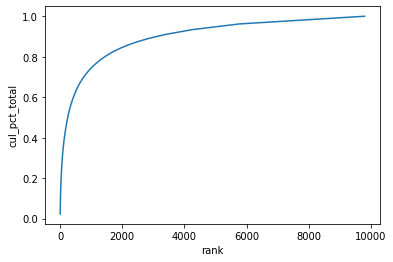

In [35]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_pct_total', data=word_count);

# Vectorization

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: `Your Answer Here`

**Document Term Matrix (DTM)**: `Your Answer Here`

**Latent Semantic Analysis**: `Your Answer Here`

**Term Frequency - Inverse Document Frequency (TF-IDF)**: `Your Answer Here`

**Word Embedding**: `Your Answer Here`

**N-Gram**: `Your Answer Here`

**Skip-Gram**: `Your Answer Here`

## Questions of Understanding

1. Why do we need to vectorize our documents?
```
Your Answer Here
```

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?
```
Your Answer Here
```

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?
```
Your Answer Here
```

## Practice Problems

Use the dataframe `df` above to complete the following.

Vectorize the `Tokens` column.

Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"

You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the `Rating` column in `df`.

In [ ]:
df['Rating'] = df['Rating'].round().astype(int)

What is the baseline accuracy?
```
Your Answer Here
```

Visualize the rating counts from above

Use your vectorized tokens in the `df` dataframe to train a classification model

Predict the score of the fake strain description below.

```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

# Topic Modeling

## Questions of Understanding

1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP?
```
Your Answer Here
```

2. How do interpret the results of a topic modeling output?
```
Your Answer Here
```

## Practice Problems

Find the top 5 topics of the `Description` column using LDA

In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics

```
Your Answer Here
```

Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results

Explain how to interpret the results of `pyLDAvis`

```
Your Answer Here
```

Create at least 1 more visualization to help you interpret the results of your topic modeling